# TO-DO's
- Add midas list to the coin list
- We need to create a test condition. Time based system test.
- Trendway needs improvement. (ROC is calculates from 12 period previously data. We should use MACD for it) 
- For the momentum trading we should be find the trend way. When we discover the trendway then we can solve this puzzle. 
- BB way indicators is not logical. We should update or consider it. 
- For the YHigh & YLow we can make a metric to complete both of them to 100. Use it as a parameter (YHigh - YLow)
- Save CSV read CSV method will add for tracking the Document. This CSV order can be sort by Date start from new. 
- Boilinger Bands Charts, Ichımochu Charts, & MACDAS Charts will create side by side as a row.  
# How to Use
- RSI <30 Buy & RSI >70 Sell 
- ADX > 20 Trend starting & we don't know the direction from this metric. Check the graphs.
- MACD_dif > 0 Can be buy signal & MACD < 0 can be sell signal
- If CCI is lower than -100 buy signal, If CCI is higher than 100 sell signal
- ROC (rate of change) is greater than 0 means upward momentum. If ROC lower than 0 means downward momentum.
- ATR (Average True Range) is a tricky metric. We can see the votality in this range. If votality is high we can trade short term. 
- If OBV (On Balance Volume) rising is a bullish signal.  If falling its a bearish sign. 


In [1]:
# Importing Process
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import numpy as np
import math
from datetime import datetime, timedelta
import time

In [2]:
portfolio = ["XU100.IS","XU030.IS","OTKAR.IS","EREGL.IS","BRYAT.IS","ARCLK.IS","SISE.IS","TATGD.IS","GSRAY.IS","KAYSE.IS",]
watchlist = ["SKBNK.IS","KCAER.IS","BIOEN.IS","IEYHO.IS","ATAKP.IS","FENER.IS","CEMAS.IS","INVES.IS","ETILR.IS","ATAKP.IS","EUREN.IS","BIOEN.IS","IZENR.IS","KAYSE.IS","MEGMT.IS","MAKIM.IS"] # It will be automated with the csv format.
nasdaq = ["AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META", "NVDA", "TSLA", "PEP", "AVGO", "COST", "CSCO", "ADBE", "NFLX", "CMCSA", "TXN", "AMD", "AMAT", "INTC", "QCOM","HON", "INTU", "SBUX", "BKNG", "MDLZ", "PYPL", "ADI", "PDD", "ADSK", "REGN", "ISRG", "LRCX", "VRTX", "MELI", "GILD", "ABNB", "SNPS", "KLAC", "MRVL", "TEAM","IDXX", "FTNT", "PANW", "WDAY", "ORLY", "CRWD", "ZS", "CDNS", "ANSS", "DXCM", "ASML", "MNST", "ROST", "CPRT", "CTAS", "BIDU", "OKTA", "EXAS", "DOCU", "CHTR","EBAY", "DDOG", "NTES", "VRSK", "LCID", "FAST", "PCAR", "SIRI", "SGEN", "TSCO", "MAR", "PTON", "BIIB", "ATVI", "MTCH", "ROKU", "CTSH", "XEL", "DLTR", "SPLK","PAYC", "CEG", "ALGN", "ZM", "AEP", "UAL", "BKNG", "FOXA", "NLOK", "AMBA", "WYNN", "TTD", "TWLO", "RBLX", "GFS", "NVCR", "SMTC"]
Coin = ["BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "USDC-USD", "XRP-USD", "DOGE-USD", "ADA-USD","SOL-USD", "DOT-USD", "MATIC-USD", "LTC-USD", "SHIB-USD", "BCH-USD", "LINK-USD", "XLM-USD","AVAX-USD", "ATOM-USD", "HBAR-USD", "FIL-USD", "TRX-USD", "APE-USD", "ICP-USD", "QNT-USD","NEAR-USD", "LDO-USD", "ALGO-USD", "ARB-USD", "EGLD-USD", "VET-USD", "MANA-USD", "FTM-USD","XTZ-USD", "GRT-USD", "AAVE-USD", "SAND-USD", "STX-USD", "EOS-USD", "CAKE-USD", "KAVA-USD","IMX-USD", "CHZ-USD", "THETA-USD", "ENJ-USD", "WAVES-USD", "RUNE-USD", "1INCH-USD", "BAT-USD","OMG-USD", "ZIL-USD", "CRO-USD", "GALA-USD", "YFI-USD", "COMP-USD", "CRV-USD", "ANKR-USD","SNX-USD", "UNI-USD", "REN-USD", "CELR-USD", "ONT-USD", "RVN-USD", "DASH-USD", "KLAY-USD","FTT-USD", "MINA-USD", "GLMR-USD", "MASK-USD", "DYDX-USD", "MKR-USD", "ZRX-USD", "BAND-USD","BAL-USD", "ROSE-USD", "FLR-USD", "MOVR-USD", "OP-USD", "TWT-USD", "WOO-USD", "NEXO-USD","HOT-USD", "SUSHI-USD", "SRM-USD", "CVC-USD", "LRC-USD", "QTUM-USD", "ICX-USD", "XEC-USD","RLC-USD", "LSK-USD", "GNO-USD", "STEEM-USD", "WAXP-USD", "SXP-USD", "VTHO-USD", "RENBTC-USD","SPELL-USD", "ILV-USD", "AKT-USD", "PENDLE-USD", "NEO-USD", "AERGO-USD"]
bist = ['A1CAP.IS','ACSEL.IS','ADESE.IS','ADGYO.IS','AEFES.IS','AFYON.IS','AGESA.IS','AGHOL.IS','AHGAZ.IS','AKBNK.IS','AKCNS.IS','AKENR.IS','AKFGY.IS','AKFYE.IS','AKGRT.IS','AKMGY.IS','AKSEN.IS','AKSGY.IS','AKSUE.IS','AKYHO.IS','ALARK.IS','ALBRK.IS','ALCAR.IS','ALCTL.IS','ALFAS.IS','ALGYO.IS','ALKIM.IS','ANELE.IS','ANGEN.IS','ANHYT.IS','ANSGR.IS','ARASE.IS','ARCLK.IS','ARDYZ.IS','ARENA.IS','ARSAN.IS','ARZUM.IS','ASELS.IS','ASGYO.IS','ASTOR.IS','ASUZU.IS','ATAGY.IS','ATAKP.IS','ATATP.IS','ATEKS.IS','AVGYO.IS','AVHOL.IS','AVOD.IS','AVPGY.IS','AVTUR.IS','AYCES.IS','AYDEM.IS','AYGAZ.IS','AZTEK.IS','BAGFS.IS','BAKAB.IS','BANVT.IS','BARMA.IS','BASGZ.IS','BAYRK.IS','BEGYO.IS','BEYAZ.IS','BFREN.IS','BIENY.IS','BIGCH.IS','BIMAS.IS','BINHO.IS','BIOEN.IS','BIZIM.IS','BJKAS.IS','BLCYT.IS','BMSCH.IS','BMSTL.IS','BNTAS.IS','BOBET.IS','BORLS.IS','BOSSA.IS','BRISA.IS','BRKSN.IS','BRKVY.IS','BRLSM.IS','BRSAN.IS','BRYAT.IS','BTCIM.IS','BUCIM.IS','BURCE.IS','BURVA.IS','BVSAN.IS','BYDNR.IS','CANTE.IS','CATES.IS','CCOLA.IS','CELHA.IS','CEMAS.IS','CEMTS.IS','CEOEM.IS','CIMSA.IS','CLEBI.IS','CMBTN.IS','CONSE.IS','COSMO.IS','CRDFA.IS','CRFSA.IS','CUSAN.IS','CWENE.IS','DAGHL.IS','DAPGM.IS','DARDL.IS','DENGE.IS','DERHL.IS','DERIM.IS','DESPC.IS','DGATE.IS','DGGYO.IS','DGNMO.IS','DITAS.IS','DMRGD.IS','DMSAS.IS','DNISI.IS','DOBUR.IS','DOFER.IS','DOGUB.IS','DOHOL.IS','DOKTA.IS','DURDO.IS','DYOBY.IS','DZGYO.IS','EBEBK.IS','ECILC.IS','ECZYT.IS','EDATA.IS','EGEEN.IS','EGEPO.IS','EGGUB.IS','EGPRO.IS','EGSER.IS','EKGYO.IS','EKSUN.IS','ELITE.IS','EMKEL.IS','ENERY.IS','ENJSA.IS','ENKAI.IS','ENSRI.IS','EPLAS.IS','ERBOS.IS','EREGL.IS','ERSU.IS','ESCAR.IS','ESCOM.IS','ETILR.IS','EUHOL.IS','EUPWR.IS','EUREN.IS','EYGYO.IS','FADE.IS','FENER.IS','FMIZP.IS','FONET.IS','FORMT.IS','FORTE.IS','FRIGO.IS','FROTO.IS','FZLGY.IS','GARAN.IS','GARFA.IS','GEDIK.IS','GEDZA.IS','GENIL.IS','GENTS.IS','GEREL.IS','GESAN.IS','GIPTA.IS','GLBMD.IS','GLCVY.IS','GLRYH.IS','GLYHO.IS','GOKNR.IS','GOLTS.IS','GOODY.IS','GOZDE.IS','GRSEL.IS','GSDDE.IS','GSDHO.IS','GSRAY.IS','GUBRF.IS','GWIND.IS','GZNMI.IS','HALKB.IS','HATEK.IS','HATSN.IS','HDFGS.IS','HEDEF.IS','HEKTS.IS','HLGYO.IS','HTTBT.IS','HUBVC.IS','HUNER.IS','HURGZ.IS','ICBCT.IS','ICUGS.IS','IDGYO.IS','IEYHO.IS','IHAAS.IS','IHEVA.IS','IHGZT.IS','IHLAS.IS','IHLGM.IS','IHYAY.IS','IMASM.IS','INDES.IS','INFO.IS','INGRM.IS','INTEM.IS','INVEO.IS','INVES.IS','ISATR.IS','ISBTR.IS','ISCTR.IS','ISDMR.IS','ISFIN.IS','ISGSY.IS','ISGYO.IS','ISKPL.IS','ISMEN.IS','ISSEN.IS','IZENR.IS','IZFAS.IS','IZMDC.IS','JANTS.IS','KAPLM.IS','KAREL.IS','KARSN.IS','KARTN.IS','KARYE.IS','KATMR.IS','KAYSE.IS','KBORU.IS','KCAER.IS','KCHOL.IS','KERVT.IS','KFEIN.IS','KIMMR.IS','KLGYO.IS','KLKIM.IS','KLMSN.IS','KLRHO.IS','KLSER.IS','KLSYN.IS','KMPUR.IS','KNFRT.IS','KONKA.IS','KONTR.IS','KONYA.IS','KOPOL.IS','KORDS.IS','KRDMA.IS','KRDMB.IS','KRDMD.IS','KRGYO.IS','KRONT.IS','KRPLS.IS','KRSTL.IS','KRTEK.IS','KRVGD.IS','KTLEV.IS','KTSKR.IS','KUTPO.IS','KUYAS.IS','KZBGY.IS','KZGYO.IS','LIDER.IS','LIDFA.IS','LKMNH.IS','LRSHO.IS','LUKSK.IS','MAALT.IS','MACKO.IS','MAGEN.IS','MAKIM.IS','MAKTK.IS','MANAS.IS','MARBL.IS','MARKA.IS','MARTI.IS','MAVI.IS','MEDTR.IS','MEGAP.IS','MEGMT.IS','MEKAG.IS','MEPET.IS','MERCN.IS','MERIT.IS','MERKO.IS','METRO.IS','METUR.IS','MGROS.IS','MHRGY.IS','MIATK.IS','MNDRS.IS','MNDTR.IS','MOBTL.IS','MPARK.IS','MRGYO.IS','MRSHL.IS','MSGYO.IS','MTRKS.IS','MZHLD.IS','NATEN.IS','NETAS.IS','NIBAS.IS','NTGAZ.IS','NTHOL.IS','NUGYO.IS','NUHCM.IS','OBASE.IS','OFSYM.IS','ONCSM.IS','ORCAY.IS','OSMEN.IS','OSTIM.IS','OTKAR.IS','OYAKC.IS','OYLUM.IS','OYYAT.IS','OZGYO.IS','OZKGY.IS','OZRDN.IS','PAGYO.IS','PAMEL.IS','PAPIL.IS','PARSN.IS','PASEU.IS','PCILT.IS','PEKGY.IS','PENGD.IS','PENTA.IS','PETKM.IS','PETUN.IS','PGSUS.IS','PINSU.IS','PKART.IS','PKENT.IS','PLTUR.IS','PNLSN.IS','PNSUT.IS','POLHO.IS','POLTK.IS','PRDGS.IS','PRKAB.IS','PRZMA.IS','PSDTC.IS','PSGYO.IS','QUAGR.IS','RALYH.IS','RAYSG.IS','REEDR.IS','RNPOL.IS','RODRG.IS','RTALB.IS','RUBNS.IS','RYGYO.IS','RYSAS.IS','SAFKR.IS','SAHOL.IS','SAMAT.IS','SANEL.IS','SANFM.IS','SANKO.IS','SARKY.IS','SAYAS.IS','SDTTR.IS','SEGYO.IS','SEKFK.IS','SEKUR.IS','SELEC.IS','SELGD.IS','SELVA.IS','SEYKM.IS','SILVR.IS','SISE.IS','SKBNK.IS','SKTAS.IS','SKYMD.IS','SMART.IS','SMRTG.IS','SNGYO.IS','SNICA.IS','SOKE.IS','SOKM.IS','SONME.IS','SRVGY.IS','SUNTK.IS','SURGY.IS','SUWEN.IS','TABGD.IS','TARKM.IS','TATEN.IS','TATGD.IS','TAVHL.IS','TCELL.IS','TDGYO.IS','TEKTU.IS','TEZOL.IS','TGSAS.IS','THYAO.IS','TKFEN.IS','TKNSA.IS','TLMAN.IS','TMPOL.IS','TNZTP.IS','TOASO.IS','TRCAS.IS','TRGYO.IS','TRILC.IS','TSGYO.IS','TSPOR.IS','TTKOM.IS','TTRAK.IS','TUCLK.IS','TUKAS.IS','TUPRS.IS','TUREX.IS','TURGG.IS','TURSG.IS','ULKER.IS','ULUFA.IS','ULUSE.IS','ULUUN.IS','UNLU.IS','VAKBN.IS','VAKFN.IS','VAKKO.IS','VANGD.IS','VBTYZ.IS','VERTU.IS','VERUS.IS','VESBE.IS','VESTL.IS','VKGYO.IS','VKING.IS','VRGYO.IS','YATAS.IS','YAYLA.IS','YEOTK.IS','YESIL.IS','YGGYO.IS','YKBNK.IS','YKSLN.IS','YUNSA.IS','YYAPI.IS','YYLGD.IS','ZEDUR.IS','ZOREN.IS','ZRGYO.IS','YGYO.IS','GMTAS.IS','XU100.IS','XU030.IS',]
bist100 = ['AEFES.IS','AGHOL.IS','AHGAZ.IS','AKBNK.IS','AKCNS.IS','AKFGY.IS','AKFYE.IS','AKSA.IS','AKSEN.IS','ALARK.IS','ALBRK.IS','ALFAS.IS','ARCLK.IS','ASELS.IS','ASTOR.IS','BERA.IS','BIENY.IS','BIMAS.IS','BRSAN.IS','BRYAT.IS','BUCIM.IS','CANTE.IS','CCOLA.IS','CIMSA.IS','CWENE.IS','DOAS.IS','DOHOL.IS','ECILC.IS','ECZYT.IS','EGEEN.IS','ENJSA.IS','ENKAI.IS','EREGL.IS','EUPWR.IS','EUREN.IS','FROTO.IS','GARAN.IS','GENIL.IS','GESAN.IS','GLYHO.IS','GUBRF.IS','HALKB.IS','HEKTS.IS','IMASM.IS','IPEKE.IS','ISCTR.IS','ISDMR.IS','ISMEN.IS','IZMDC.IS','KARSN.IS','KAYSE.IS','KCAER.IS','KCHOL.IS','KMPUR.IS','KONTR.IS','KONYA.IS','KORDS.IS','KOZAA.IS','KOZAL.IS','KRDMD.IS','KZBGY.IS','MAVI.IS','MGROS.IS','MIATK.IS','ODAS.IS','OTKAR.IS','OYAKC.IS','PENTA.IS','PETKM.IS','PGSUS.IS','QUAGR.IS','SAHOL.IS','SASA.IS','SISE.IS','SKBNK.IS','SMRTG.IS','SOKM.IS','TAVHL.IS','TCELL.IS','THYAO.IS','TKFEN.IS','TOASO.IS','TSKB.IS','TTKOM.IS','TTRAK.IS','TUKAS.IS','TUPRS.IS','ULKER.IS','VAKBN.IS','VESBE.IS','YEOTK.IS','YKBNK.IS','YYLGD.IS','ZOREN.IS']

In [3]:
# Data downloading and processing cell
bist = Coin
#bist = ["BTC-USD"]
stock_dict = {}
stock_data = []
stock_number = 0
#bist = portfolio
for stocks in bist:
    try:
        ticker = yf.Ticker(stocks)
        stock_info = ticker.info
        data = {key: stock_info.get(key, None) for key in ["symbol", "priceToBook", "regularMarketPrice", "targetHighPrice", "targetLowPrice", "targetMeanPrice", "targetMedianPrice",
                                                            "bookValue", "open", "dayLow", "dayHigh", "recommendationKey", 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh']}
        historical_data = ticker.history(period="1y")  # Get historical data for the stock
        stock_dict[stocks] = historical_data
        if historical_data.empty:
            print(f"No historical data for {stocks}, skipping...")
            continue  # Skip this ticker if no historical data is found
        stock_number = 1 + stock_number
        print(f"\r{stock_number}/{len(bist)} Downloaded {stocks} data", end='', flush=True)

        historical_data['RSI'] = ta.rsi(historical_data['Close'], length=14)  # Calculate RSI (Relative Strength Index)
        adx_data = ta.adx(historical_data['High'], historical_data['Low'], historical_data['Close'], length=14)  # Calculate ADX (Average Directional Index)
        historical_data['ADX'] = adx_data['ADX_14']

        # Calculate MACD using EMA
        macd = ta.macd(historical_data['Close'], fast=12, slow=26, signal=9)
        historical_data = pd.concat([historical_data, macd], axis=1)

        # Calculate MACDAS (MACD Histogram)
        historical_data['MACDAS'] = historical_data['MACD_12_26_9'] - historical_data['MACDs_12_26_9']

        # Calculate MACDAS Signal Line (9-period EMA of MACDAS)
        historical_data['MACDAS_Signal'] = historical_data['MACDAS'].ewm(span=9, adjust=False).mean()

        historical_data['CCI'] = ta.cci(historical_data['High'], historical_data['Low'], historical_data['Close'], length=20)  # Calculate CCI (Commodity Channel Index)
        historical_data['ROC'] = ta.roc(historical_data['Close'], length=12)  # Calculate ROC (Rate of Change)
        historical_data['ATR'] = ta.atr(historical_data['High'], historical_data['Low'], historical_data['Close'], length=14)  # Calculate ATR (Average True Range)

        # Calculate Bollinger Bands
        bollinger = ta.bbands(historical_data['Close'], length=20, std=2)
        historical_data['BB_Middle'] = bollinger.iloc[:, 1]  # Middle Band
        historical_data['BB_Upper'] = bollinger.iloc[:, 2]  # Upper Band
        historical_data['BB_Lower'] = bollinger.iloc[:, 0]  # Lower Band
        historical_data['BB_BWidth'] = bollinger.iloc[:, 3]  # Bandwidth
        historical_data['BB_%B'] = bollinger.iloc[:, 4]  # %B

        # Calculate BB Signal
        recent_close = historical_data['Close'].iloc[-1]
        recent_bb_upper = historical_data['BB_Upper'].iloc[-1]
        recent_bb_lower = historical_data['BB_Lower'].iloc[-1]

        if recent_close > recent_bb_upper:
            bb_signal = "Sell"
        elif recent_close < recent_bb_lower:
            bb_signal = "Buy"
        else:
            bb_signal = "Neutral"

        data["BB_Signal"] = bb_signal

        historical_data['OBV'] = ta.obv(historical_data['Close'], historical_data['Volume'])  # Calculate OBV (On-Balance Volume)
        historical_data['CMF'] = ta.cmf(historical_data['High'], historical_data['Low'], historical_data['Close'], historical_data['Volume'], length=20)  # Calculate CMF (Chaikin Money Flow)
        historical_data['AD'] = ta.ad(historical_data['High'], historical_data['Low'], historical_data['Close'], historical_data['Volume'])  # Calculate A/D Line (Accumulation/Distribution Line)

        high_9 = historical_data['High'].rolling(window=9).max()  # Calculate Ichimoku Cloud components
        low_9 = historical_data['Low'].rolling(window=9).min()
        historical_data['Tenkan_sen'] = (high_9 + low_9) / 2
        high_26 = historical_data['High'].rolling(window=26).max()
        low_26 = historical_data['Low'].rolling(window=26).min()
        historical_data['Kijun_sen'] = (high_26 + low_26) / 2
        historical_data['Senkou_Span_A'] = ((historical_data['Tenkan_sen'] + historical_data['Kijun_sen']) / 2).shift(26)
        high_52 = historical_data['High'].rolling(window=52).max()
        low_52 = historical_data['Low'].rolling(window=52).min()
        historical_data['Senkou_Span_B'] = ((high_52 + low_52) / 2).shift(26)
        historical_data['Chikou_Span'] = historical_data['Close'].shift(-26)

        # Buy/Sell Signal Calculation for Ichimoku
        recent_close = historical_data['Close'].iloc[-1]
        recent_tenkan = historical_data['Tenkan_sen'].iloc[-1]
        recent_kijun = historical_data['Kijun_sen'].iloc[-1]
        recent_senkou_a = historical_data['Senkou_Span_A'].iloc[-1]
        recent_senkou_b = historical_data['Senkou_Span_B'].iloc[-1]

        if recent_close > max(recent_senkou_a, recent_senkou_b) and recent_tenkan > recent_kijun:
            data["IchiSignal"] = "Buy"
        elif recent_close < min(recent_senkou_a, recent_senkou_b) and recent_tenkan < recent_kijun:
            data["IchiSignal"] = "Sell"
        else:
            data["IchiSignal"] = "Neutral"

        data.update({"Tenkan_sen": recent_tenkan, "Kijun_sen": recent_kijun, "Senkou_Span_A": recent_senkou_a, "Senkou_Span_B": recent_senkou_b,
                     "Chikou_Span": historical_data['Chikou_Span'].iloc[-1], "RSI": historical_data['RSI'].iloc[-1], "ADX": historical_data['ADX'].iloc[-1],
                     "CCI": historical_data['CCI'].iloc[-1], "ROC": historical_data['ROC'].iloc[-1], "ATR": historical_data['ATR'].iloc[-1], "OBV": historical_data['OBV'].iloc[-1],
                     "CMF": historical_data['CMF'].iloc[-1], "AD": historical_data['AD'].iloc[-1],
                     "MACD": historical_data['MACD_12_26_9'].iloc[-1],  # MACD Line
                     "MACD_signal": historical_data['MACDs_12_26_9'].iloc[-1],  # MACD Signal Line
                     "MACD_Hist": historical_data['MACDh_12_26_9'].iloc[-1],  # MACD Histogram
                     "MACDAS": historical_data['MACDAS'].iloc[-1],  # MACDAS
                     "MACDAS_Signal": historical_data['MACDAS_Signal'].iloc[-1],  # MACDAS Signal Line
                     "BB_Middle": historical_data['BB_Middle'].iloc[-1],
                     "BB_Upper": historical_data['BB_Upper'].iloc[-1],
                     "BB_Lower": historical_data['BB_Lower'].iloc[-1],
                     'BB_%B': historical_data['BB_%B'].iloc[-1],
                     'BB_BWidth': historical_data['BB_BWidth'].iloc[-1],
                     })
        stock_data.append(data)

    except Exception as e:
        print(f"Error fetching data for {stocks}: {e}")

# Create a DataFrame from the stock data
df = pd.DataFrame(stock_data)
df["MACDAS-dif"] = df["MACDAS"] - df["MACDAS_Signal"] 
#df["change"] = ((df["currentPrice"] / df["open"]) - 1) * 100
df["change"] = ((df["regularMarketPrice"] / df["open"]) - 1) * 100

df["BB_Pot"] = ((df['BB_Upper'] / df["regularMarketPrice"]) - 1) * 100
df["BB_Opt"] = ((df['BB_Lower'] / df["regularMarketPrice"]) - 1) * 100
df["TrendWay"] = np.select([(df["ADX"] > 20) & (df["ROC"] > 0), (df["ADX"] > 20) & (df["ROC"] <= 0), (df["ADX"] <= 20)], ["upper", "lower", "no-trend"], default="unknown")

# Removed Columns "BB_Signal",'BB_Middle','BB_Upper','BB_Lower', "Senkou_Span_A","IchiSignal", "Senkou_Span_B", "Tenkan_sen", "Kijun_sen","OBV", "CMF", "AD", "TrendWay","priceToBook","BB_Upper","BB_Middle", "BB_Lower" "BB_Pot","BB_Opt",
df1 = df[["symbol","MACDAS-dif","MACDAS","MACDAS_Signal", 'BB_BWidth', 'BB_%B', "regularMarketPrice", 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', "RSI", "ADX", "CCI", "ROC", "ATR", "change"]]
df2 = df1.rename(columns={"fiftyTwoWeekHigh": "YHigh", "fiftyTwoWeekLow": "YLow", "regularMarketPrice": "CPrice"})

pd.set_option('display.float_format', '{:.2f}'.format)
print("\nDownload process is done!")
df2
now = datetime.now()  # This part will copy for our sell lists. Especially further analysis.
formatted_time = now.strftime("%m-%d_%H-%M-%S")
df2.to_csv(f"CSVs/Results {formatted_time}.csv")
df2

33/102 Downloaded XTZ-USD dataaa

$GRT-USD: possibly delisted; no price data found  (period=1y)


No historical data for GRT-USD, skipping...
39/102 Downloaded KAVA-USD data

$IMX-USD: possibly delisted; no price data found  (period=1y)


No historical data for IMX-USD, skipping...
51/102 Downloaded YFI-USD dataaa

$COMP-USD: possibly delisted; no price data found  (period=1y)


No historical data for COMP-USD, skipping...
64/102 Downloaded GLMR-USD data

$MASK-USD: possibly delisted; no price data found  (period=1y)


No historical data for MASK-USD, skipping...
98/102 Downloaded AERGO-USD dataa
Download process is done!


,symbol,MACDAS-dif,MACDAS,MACDAS_Signal,BB_BWidth,BB_%B,CPrice,YLow,YHigh,RSI,ADX,CCI,ROC,ATR,change
0,BTC-USD,-527.42,-960.39,-432.97,9.53,0.33,104589.89,49121.24,111970.17,51.74,25.35,-58.26,-0.96,2826.59,0.56
1,ETH-USD,-14.50,-28.47,-13.97,9.80,0.39,2539.86,1386.80,4106.96,57.59,33.21,-55.00,0.42,136.25,0.35
2,USDT-USD,0.00,-0.00,-0.00,0.08,0.68,1.00,1.00,1.00,53.67,16.16,152.25,0.00,0.00,0.02
3,BNB-USD,-2.49,-2.61,-0.12,8.36,0.40,657.54,407.52,793.35,51.61,31.86,-48.82,1.18,18.33,0.30
4,USDC-USD,0.00,-0.00,-0.00,0.06,0.46,1.00,1.00,1.00,49.27,14.43,29.65,-0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ILV-USD,-0.03,-0.18,-0.15,29.59,0.17,12.77,10.04,98.65,41.38,14.82,-148.68,-6.48,1.09,3.15
94,AKT-USD,-0.01,-0.05,-0.03,35.43,-0.01,1.26,0.86,4.93,37.24,30.17,-229.22,-18.10,0.13,0.90
95,PENDLE-USD,-0.05,-0.07,-0.02,20.93,0.27,4.03,1.84,7.13,49.05,22.22,-80.01,-2.64,0.32,2.27
96,NEO-USD,-0.05,-0.11,-0.06,22.62,0.03,5.92,4.33,26.08,41.05,19.96,-212.21,-8.75,0.42,2.08


In [4]:
# This part need too much improvement but the base version still good
def plot_portfolio_with_percentage(bist, benchmark="XU100.IS"):
    # Download benchmark data
    benchmark_data = yf.Ticker(benchmark).history(period="1y", interval="1h")
    if benchmark_data.empty:
        print(f"Benchmark data ({benchmark}) not available. Skipping benchmark.")
        benchmark_data = None
    else:
        benchmark_data['Pct_Change'] = (benchmark_data['Close'] / benchmark_data['Close'].iloc[0] - 1) * 100

    portfolio_size = len(bist)
    cols = 3  # Number of charts per row
    rows = math.ceil(portfolio_size / cols)  # Calculate the number of rows needed
    fig, axes = plt.subplots(rows * 3, cols, figsize=(15, 5 * rows * 3))  # Adjusted for 3 subplots per stock
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i, stock in enumerate(bist):
        try:
            # Download historical data
            historical_data = yf.Ticker(stock).history(period="1y",interval="1h")
            if historical_data.empty:
                print(f"No data available for {stock}. Skipping chart.")
                continue

            # Calculate indicators
            macd = ta.macd(historical_data['Close'], fast=12, slow=26, signal=9)
            historical_data = pd.concat([historical_data, macd], axis=1)
            historical_data['MACDAS'] = historical_data['MACD_12_26_9'] - historical_data['MACDs_12_26_9']
            historical_data['MACDAS_Signal'] = historical_data['MACDAS'].ewm(span=9, adjust=False).mean()

            bollinger = ta.bbands(historical_data['Close'], length=20, std=2)
            historical_data['BB_Middle'] = bollinger.iloc[:, 1]
            historical_data['BB_Upper'] = bollinger.iloc[:, 2]
            historical_data['BB_Lower'] = bollinger.iloc[:, 0]

            # Calculate percentage change for the stock
            historical_data['Pct_Change'] = (historical_data['Close'] / historical_data['Close'].iloc[0] - 1) * 100

            # Plot percentage change
            ax1 = axes[i * 3]
            ax1.plot(historical_data.index, historical_data['Pct_Change'], label=f'{stock} % Change', color='blue', linewidth=1.5)
            if benchmark_data is not None:
                ax1.plot(benchmark_data.index, benchmark_data['Pct_Change'], label=f'{benchmark} % Change', color='red', linewidth=1)
            ax1.set_title(f"{stock} - 1 Year Performance", fontsize=12)
            ax1.set_xlabel("Date", fontsize=10)
            ax1.set_ylabel("Percentage Change (%)", fontsize=10)
            ax1.legend(loc='upper left', fontsize=8)
            ax1.grid(alpha=0.3)

            # Plot MACDAS
            ax2 = axes[i * 3 + 1]
            ax2.plot(historical_data.index, historical_data['MACDAS'], label='MACDAS', color='purple')
            ax2.plot(historical_data.index, historical_data['MACDAS_Signal'], label='MACDAS Signal', color='orange')
            ax2.set_title(f"{stock} - MACDAS", fontsize=12)
            ax2.set_xlabel("Date", fontsize=10)
            ax2.set_ylabel("MACDAS", fontsize=10)
            ax2.legend(loc='upper left', fontsize=8)
            ax2.grid(alpha=0.3)

            # Plot Bollinger Bands
            ax3 = axes[i * 3 + 2]
            ax3.plot(historical_data.index, historical_data['Close'], label='Close Price', color='blue')
            ax3.plot(historical_data.index, historical_data['BB_Upper'], label='Upper Band', color='red', linestyle='--')
            ax3.plot(historical_data.index, historical_data['BB_Lower'], label='Lower Band', color='green', linestyle='--')
            ax3.fill_between(historical_data.index, historical_data['BB_Lower'], historical_data['BB_Upper'], color='gray', alpha=0.1)
            ax3.set_title(f"{stock} - Bollinger Bands", fontsize=12)
            ax3.set_xlabel("Date", fontsize=10)
            ax3.set_ylabel("Price", fontsize=10)
            ax3.legend(loc='upper left', fontsize=8)
            ax3.grid(alpha=0.3)

        except Exception as e:
            print(f"Error processing data for {stock}: {e}")

    # Hide unused subplots if portfolio size is not a multiple of 3
    for j in range(i * 3 + 3, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust spacing
    plt.show()

# Example usage
#testpart = ["YKBNK.IS"]
#plot_portfolio_with_percentage(testpart)

In [5]:
def plot_portfolio_with_percentage(bist, stock_dict, benchmark="XU100.IS"):
    # Use benchmark data from stock_dict if available, otherwise download
    if benchmark in stock_dict:
        benchmark_data = stock_dict[benchmark].copy()  # Make a copy to avoid modifying original
        benchmark_data['Pct_Change'] = ((benchmark_data['Close'] / benchmark_data['Close'].iloc[0]) - 1) * 100
    else:
        benchmark_data = yf.Ticker(benchmark).history(period="1y", interval="1h")
        if benchmark_data.empty:
            print(f"Benchmark data ({benchmark}) not available. Skipping benchmark.")
            benchmark_data = None
        else:
            benchmark_data['Pct_Change'] = ((benchmark_data['Close'] / benchmark_data['Close'].iloc[0]) - 1) * 100

    portfolio_size = len(bist)
    cols = 3  # Number of charts per row
    rows = math.ceil(portfolio_size / cols)  # Calculate the number of rows needed
    fig, axes = plt.subplots(rows * 3, cols, figsize=(15, 5 * rows * 3))
    axes = axes.flatten()

    for i, stock in enumerate(bist):
        try:
            # Use stored historical data instead of downloading again
            if stock not in stock_dict:
                print(f"No stored data for {stock}. Skipping chart.")
                continue
                
            historical_data = stock_dict[stock].copy()  # Make a copy to avoid modifying original data

            # Calculate percentage change
            historical_data['Pct_Change'] = ((historical_data['Close'] / historical_data['Close'].iloc[0]) - 1) * 100

            # Calculate indicators (only if they don't exist)
            if 'MACDAS' not in historical_data.columns:
                macd = ta.macd(historical_data['Close'], fast=12, slow=26, signal=9)
                historical_data = pd.concat([historical_data, macd], axis=1)
                historical_data['MACDAS'] = historical_data['MACD_12_26_9'] - historical_data['MACDs_12_26_9']
                historical_data['MACDAS_Signal'] = historical_data['MACDAS'].ewm(span=9, adjust=False).mean()

            if 'BB_Middle' not in historical_data.columns:
                bollinger = ta.bbands(historical_data['Close'], length=20, std=2)
                historical_data['BB_Middle'] = bollinger.iloc[:, 1]
                historical_data['BB_Upper'] = bollinger.iloc[:, 2]
                historical_data['BB_Lower'] = bollinger.iloc[:, 0]

            # Plot percentage change
            ax1 = axes[i * 3]
            ax1.plot(historical_data.index, historical_data['Pct_Change'], label=f'{stock} % Change', color='blue', linewidth=1.5)
            if benchmark_data is not None:
                ax1.plot(benchmark_data.index, benchmark_data['Pct_Change'], label=f'{benchmark} % Change', color='red', linewidth=1)
            ax1.set_title(f"{stock} - 1 Year Performance", fontsize=12)
            ax1.set_xlabel("Date", fontsize=10)
            ax1.set_ylabel("Percentage Change (%)", fontsize=10)
            ax1.legend(loc='upper left', fontsize=8)
            ax1.grid(alpha=0.3)

            # Plot MACDAS
            ax2 = axes[i * 3 + 1]
            ax2.plot(historical_data.index, historical_data['MACDAS'], label='MACDAS', color='purple')
            ax2.plot(historical_data.index, historical_data['MACDAS_Signal'], label='MACDAS Signal', color='orange')
            ax2.set_title(f"{stock} - MACDAS", fontsize=12)
            ax2.set_xlabel("Date", fontsize=10)
            ax2.set_ylabel("MACDAS", fontsize=10)
            ax2.legend(loc='upper left', fontsize=8)
            ax2.grid(alpha=0.3)

            # Plot Bollinger Bands
            ax3 = axes[i * 3 + 2]
            ax3.plot(historical_data.index, historical_data['Close'], label='Close Price', color='blue')
            ax3.plot(historical_data.index, historical_data['BB_Upper'], label='Upper Band', color='red', linestyle='--')
            ax3.plot(historical_data.index, historical_data['BB_Lower'], label='Lower Band', color='green', linestyle='--')
            ax3.fill_between(historical_data.index, historical_data['BB_Lower'], historical_data['BB_Upper'], color='gray', alpha=0.1)
            ax3.set_title(f"{stock} - Bollinger Bands", fontsize=12)
            ax3.set_xlabel("Date", fontsize=10)
            ax3.set_ylabel("Price", fontsize=10)
            ax3.legend(loc='upper left', fontsize=8)
            ax3.grid(alpha=0.3)

        except Exception as e:
            print(f"Error processing data for {stock}: {e}")

    # Hide unused subplots
    for j in range(i * 3 + 3, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [6]:
def plot_portfolio_with_percentage(bist, stock_dict, benchmark="XU100.IS", period='1M'):
    # Use benchmark data from stock_dict if available, otherwise download
    if benchmark in stock_dict:
        benchmark_data = stock_dict[benchmark].copy()  # Make a copy to avoid modifying original
        # Calculate indicators using full data
        benchmark_data['Pct_Change'] = ((benchmark_data['Close'] / benchmark_data['Close'].iloc[0]) - 1) * 100
        # Then filter for display
        last_30_days = pd.Timestamp.now(tz='UTC') - pd.Timedelta(days=30)
        benchmark_data = benchmark_data[benchmark_data.index >= last_30_days]
    else:
        benchmark_data = yf.Ticker(benchmark).history(period="1mo", interval="1h")
        if benchmark_data.empty:
            print(f"Benchmark data ({benchmark}) not available. Skipping benchmark.")
            benchmark_data = None
        else:
            benchmark_data['Pct_Change'] = ((benchmark_data['Close'] / benchmark_data['Close'].iloc[0]) - 1) * 100

    portfolio_size = len(bist)
    cols = 3  # Number of charts per row
    rows = math.ceil(portfolio_size / cols)  # Calculate the number of rows needed
    fig, axes = plt.subplots(rows * 3, cols, figsize=(15, 5 * rows * 3))
    axes = axes.flatten()

    for i, stock in enumerate(bist):
        try:
            # Use stored historical data instead of downloading again
            if stock not in stock_dict:
                print(f"No stored data for {stock}. Skipping chart.")
                continue
                
            # Use full historical data for calculations
            historical_data = stock_dict[stock].copy()  # Make a copy to avoid modifying original data

            # Calculate MACD using full dataset
            try:
                macd = ta.macd(historical_data['Close'], fast=12, slow=26, signal=9)
                if not macd.empty:
                    historical_data = pd.concat([historical_data, macd], axis=1)
                    if all(col in historical_data.columns for col in ['MACD_12_26_9', 'MACDs_12_26_9']):
                        historical_data['MACDAS'] = historical_data['MACD_12_26_9'].fillna(0) - historical_data['MACDs_12_26_9'].fillna(0)
                        historical_data['MACDAS_Signal'] = historical_data['MACDAS'].ewm(span=9, adjust=False).mean()
            except Exception as e:
                print(f"Error calculating MACD for {stock}: {e}")

            # Calculate Bollinger Bands using full dataset
            try:
                bollinger = ta.bbands(historical_data['Close'], length=20, std=2)
                if not bollinger.empty:
                    historical_data['BB_Middle'] = bollinger.iloc[:, 1]
                    historical_data['BB_Upper'] = bollinger.iloc[:, 2]
                    historical_data['BB_Lower'] = bollinger.iloc[:, 0]
            except Exception as e:
                print(f"Error calculating Bollinger Bands for {stock}: {e}")

            # Now filter for display
            last_30_days = pd.Timestamp.now(tz='UTC') - pd.Timedelta(days=30)
            historical_data = historical_data[historical_data.index >= last_30_days]

            # Calculate percentage change for display period
            historical_data['Pct_Change'] = ((historical_data['Close'] / historical_data['Close'].iloc[0]) - 1) * 100

            # Plot percentage change
            ax1 = axes[i * 3]
            ax1.plot(historical_data.index, historical_data['Pct_Change'], label=f'{stock} % Change', color='blue', linewidth=1.5)
            if benchmark_data is not None:
                ax1.plot(benchmark_data.index, benchmark_data['Pct_Change'], label=f'{benchmark} % Change', color='red', linewidth=1)
            ax1.set_title(f"{stock} - 1 Month Performance", fontsize=12)
            ax1.set_xlabel("Date", fontsize=10)
            ax1.set_ylabel("Percentage Change (%)", fontsize=10)
            ax1.legend(loc='upper left', fontsize=8)
            ax1.grid(alpha=0.3)

            # Plot MACDAS if available
            ax2 = axes[i * 3 + 1]
            if all(col in historical_data.columns for col in ['MACDAS', 'MACDAS_Signal']):
                ax2.plot(historical_data.index, historical_data['MACDAS'], label='MACDAS', color='purple')
                ax2.plot(historical_data.index, historical_data['MACDAS_Signal'], label='MACDAS Signal', color='orange')
            ax2.set_title(f"{stock} - MACDAS", fontsize=12)
            ax2.set_xlabel("Date", fontsize=10)
            ax2.set_ylabel("MACDAS", fontsize=10)
            ax2.legend(loc='upper left', fontsize=8)
            ax2.grid(alpha=0.3)

            # Plot Bollinger Bands if available
            ax3 = axes[i * 3 + 2]
            ax3.plot(historical_data.index, historical_data['Close'], label='Close Price', color='blue')
            if all(col in historical_data.columns for col in ['BB_Upper', 'BB_Lower']):
                ax3.plot(historical_data.index, historical_data['BB_Upper'], label='Upper Band', color='red', linestyle='--')
                ax3.plot(historical_data.index, historical_data['BB_Lower'], label='Lower Band', color='green', linestyle='--')
                ax3.fill_between(historical_data.index, historical_data['BB_Lower'], historical_data['BB_Upper'], color='gray', alpha=0.1)
            ax3.set_title(f"{stock} - Bollinger Bands", fontsize=12)
            ax3.set_xlabel("Date", fontsize=10)
            ax3.set_ylabel("Price", fontsize=10)
            ax3.legend(loc='upper left', fontsize=8)
            ax3.grid(alpha=0.3)

            # Rotate x-axis labels for better readability
            for ax in [ax1, ax2, ax3]:
                ax.tick_params(axis='x', rotation=45)

        except Exception as e:
            print(f"Error processing data for {stock}: {e}")

    # Hide unused subplots
    for j in range(i * 3 + 3, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

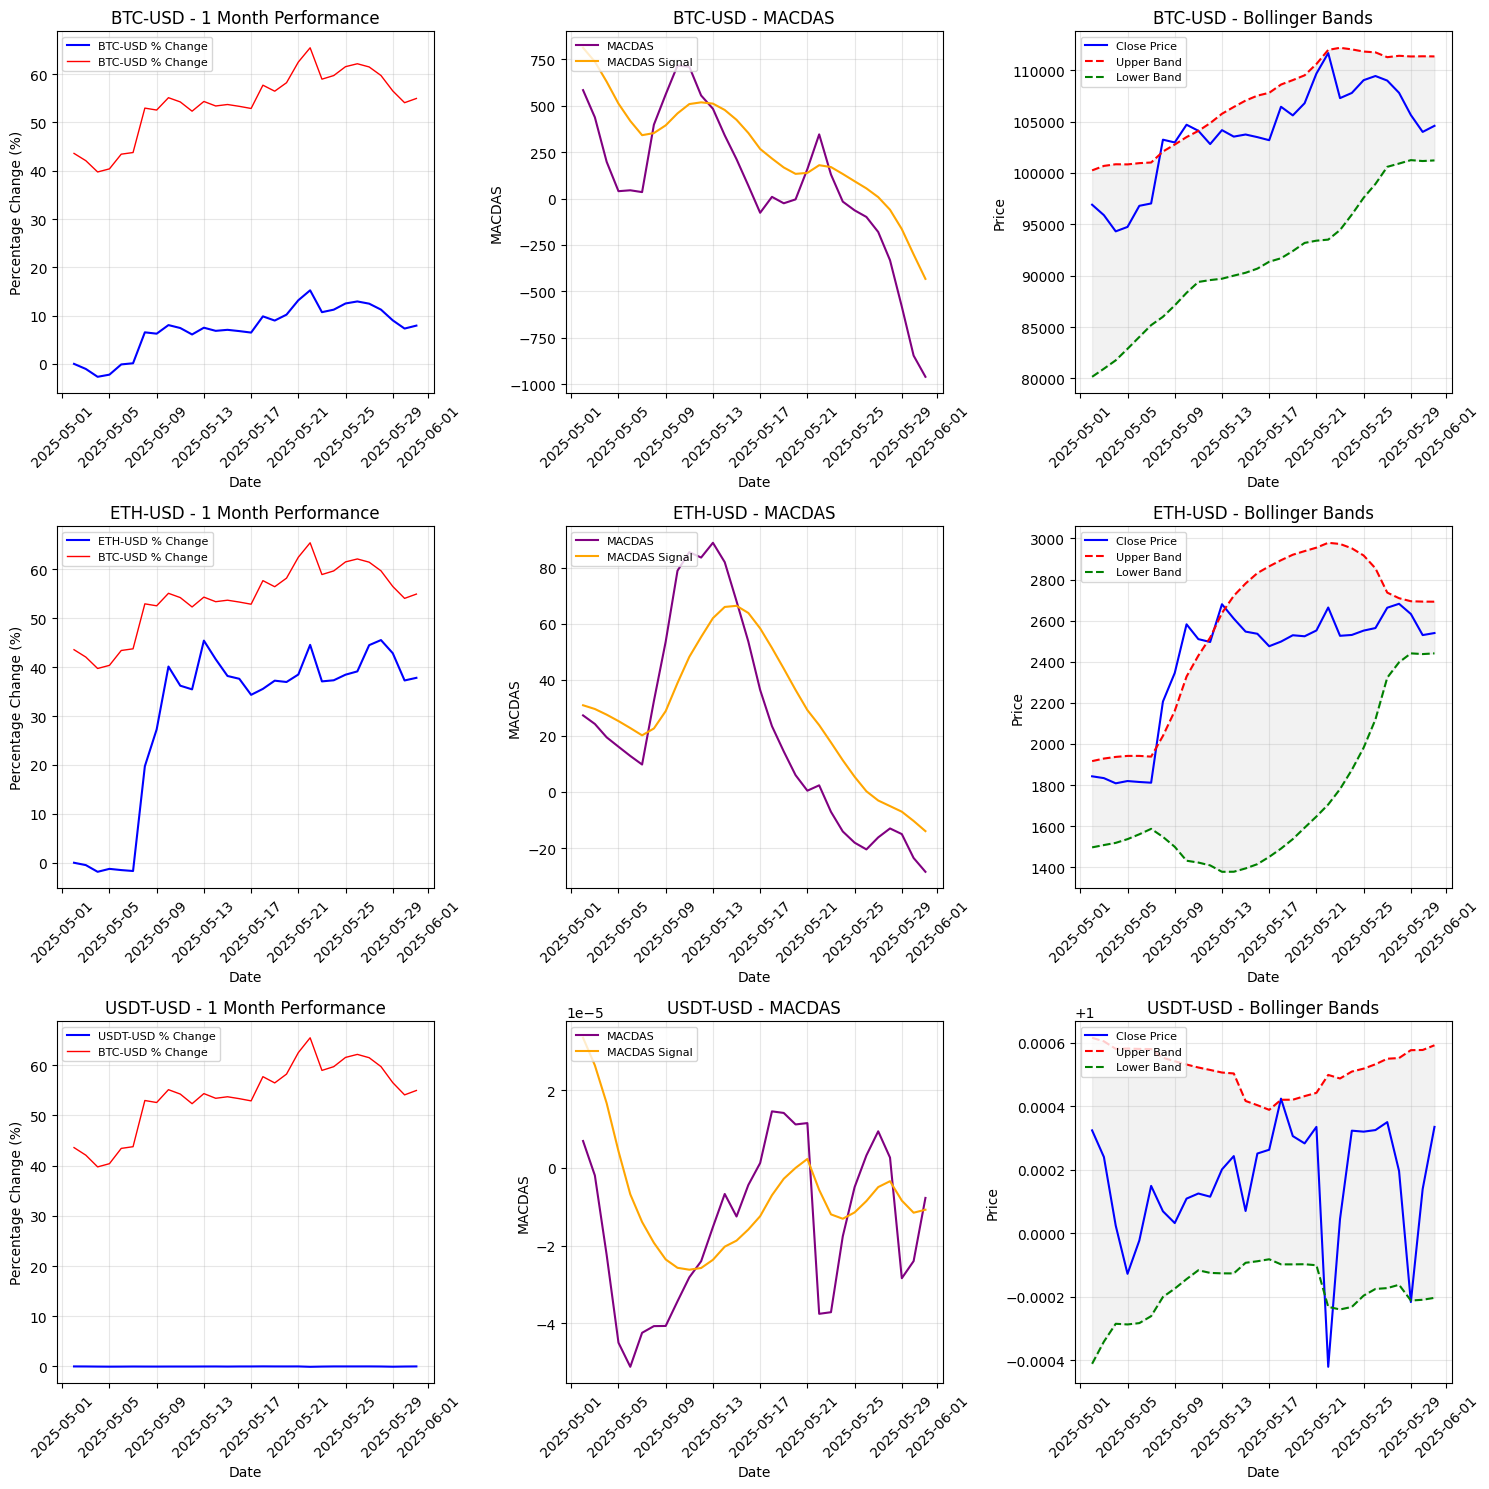

In [7]:
chartList = ["BTC-USD", "ETH-USD", "USDT-USD"]
plot_portfolio_with_percentage(chartList, stock_dict, benchmark="BTC-USD")

In [15]:
cheap = df2                         #we can catch early bullish stocks with this sample
#cheap = cheap[cheap["IchiSignal"]=="Buy"]
cheap = cheap[cheap["CCI"] < -80]
cheap = cheap[cheap["RSI"] < 40]
#cheap = cheap[cheap["ROC"] > 0]
cheap = cheap.sort_values(by="RSI")
cheap.head(50)

,symbol,MACDAS-dif,MACDAS,MACDAS_Signal,BB_BWidth,BB_%B,CPrice,YLow,YHigh,RSI,ADX,CCI,ROC,ATR,change
85,LSK-USD,-0.00,-0.01,-0.01,29.67,-0.05,0.43,0.39,1.55,31.46,15.87,-213.28,-17.08,0.03,-0.52
52,ANKR-USD,-0.00,-0.00,-0.00,31.38,0.05,0.02,0.01,0.06,33.42,18.66,-187.30,-13.77,0.00,0.92
12,SHIB-USD,-0.00,-0.00,-0.00,24.33,0.01,0.00,0.00,0.00,33.83,20.38,-238.10,-14.74,0.00,0.23
89,SXP-USD,-0.00,-0.00,-0.00,30.05,0.05,0.17,0.14,0.48,34.17,15.30,-181.78,-13.36,0.01,1.56
80,LRC-USD,-0.00,-0.00,-0.00,37.71,0.01,0.09,0.08,0.33,34.21,21.41,-178.11,-20.50,0.01,1.19
57,ONT-USD,-0.00,-0.00,-0.00,30.28,0.05,0.13,0.11,0.39,34.25,17.98,-179.00,-14.13,0.01,1.45
42,WAVES-USD,-0.01,-0.03,-0.02,24.90,-0.08,1.09,0.76,2.67,34.49,22.82,-206.72,-19.23,0.07,-0.33
36,EOS-USD,-0.01,-0.02,-0.01,30.80,-0.05,0.64,0.40,1.53,34.73,28.64,-217.63,-17.27,0.05,-2.07
91,RENBTC-USD,-110.83,-138.46,-27.63,12.56,-0.10,15106.52,12651.31,106491.27,35.17,20.48,-255.11,-9.71,1007.74,0.90
62,MINA-USD,-0.00,-0.01,-0.00,31.38,-0.01,0.21,0.18,1.04,35.27,14.69,-222.94,-14.84,0.02,0.76
